In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bs4
import matplotlib.pyplot as plt


In [2]:
file1 = open("export.xml", "r")
source = file1.read()
soup = bs4.BeautifulSoup(source, features="xml")

The Step Count Dataframe

In [3]:
list = []
dict = {}
year_list = []
month_list = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

steps = soup.findAll("Record",{"type":"HKQuantityTypeIdentifierStepCount"})
for item in steps:
    date = str(item.get("creationDate"))
    date = date[0:date.find(' ')]
    year = int(date[0:date.find('-')])
    if(year not in year_list):
        year_list.append(year)



data = []

for year in year_list:
    month_dict = {}
    for item in steps:
        if int(str(item.get("creationDate"))[0:date.find('-')]) == year:
            date = str(item.get("creationDate"))
            date = date[0:date.find(' ')]
            month = int(date[date.find('-') + 1:date.rfind('-')])
            count = int(item.get("value"))
            if month_list[month - 1] not in month_dict:
                month_dict[month_list[month - 1]] = count
            else:
                month_dict[month_list[month - 1]] += count
    data.append({"Year": year, **month_dict})

# Creating the DataFrame from the list of dictionaries
df = pd.DataFrame(data)

# Setting the 'Year' column as the index
df.set_index('Year', inplace=True)

# Filling NaN values with 0
df = df.fillna(0)

#df = df.T

#df = df.reindex(month_list)
df.columns = pd.CategoricalIndex(df.columns, categories=month_list, ordered=True)
df = df.sort_index(axis=1)

#removing the year 2016 since it has all zeros instead of december
df = df.iloc[1:]

#assigning average of all values to the empty value in 2023 december
df.at[2023, "December"] = df.values.mean()
df = df.round(1)

# Displaying the DataFrame
df

,January,February,March,April,May,June,July,August,September,October,November,December
Year,,,,,,,,,,,,
2017,168528.0,204897.0,241246.0,222864.0,296720.0,129188.0,110668.0,103142.0,207190.0,288968.0,309345.0,321177.0
2018,297553.0,261237.0,298103.0,304418.0,339245.0,154605.0,90046.0,117045.0,190099.0,209943.0,291058.0,220899.0
2019,151350.0,188808.0,182652.0,231222.0,168468.0,83980.0,105353.0,102128.0,249863.0,236234.0,189479.0,255549.0
2020,204329.0,240512.0,142643.0,23298.0,35577.0,124112.0,84407.0,138565.0,77415.0,93437.0,65578.0,40036.0
2021,40449.0,48052.0,102852.0,64727.0,40614.0,75335.0,122461.0,149448.0,328759.0,301755.0,298021.0,193645.0
2022,149015.0,132263.0,145960.0,122447.0,136624.0,131680.0,229942.0,112516.0,112131.0,206403.0,143435.0,183974.0
2023,185637.0,185952.0,177064.0,193751.0,139627.0,641692.0,319709.0,155514.0,178982.0,200690.0,25935.0,175836.2


The Step Count Dataframe Updated To See Only the Average Steps Each Year

In [20]:
average_dict = {}
idx = 0
for i in range(2017,2024):
    sum = 0
    for month in month_list:
        sum += df.iloc[idx][month]

    average_dict[str(i)] = sum/12
    idx += 1

temp_list = []
temp_list.append(average_dict)
df_new = pd.DataFrame(temp_list)
df_new

,2017,2018,2019,2020,2021,2022,2023
0,216994.416667,231187.583333,178757.166667,105825.75,147176.5,150532.5,215032.433333


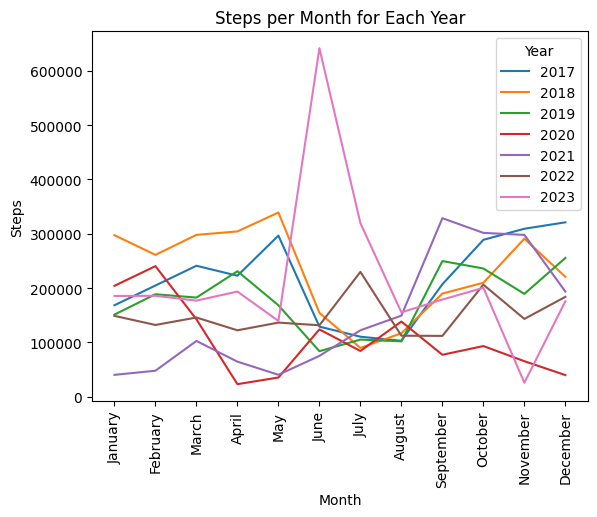

In [21]:
for index, row in df.iterrows():
    plt.plot(row, label=index)

plt.xlabel('Month')
plt.ylabel('Steps')
plt.title('Steps per Month for Each Year')
plt.xticks(rotation=90)
plt.legend(title='Year')

plt.show()

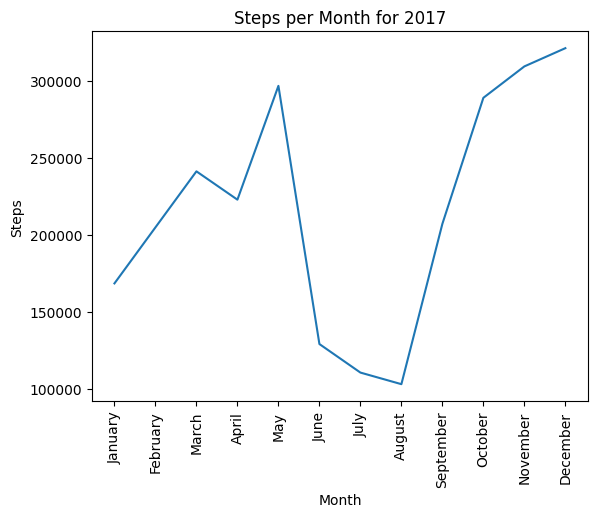

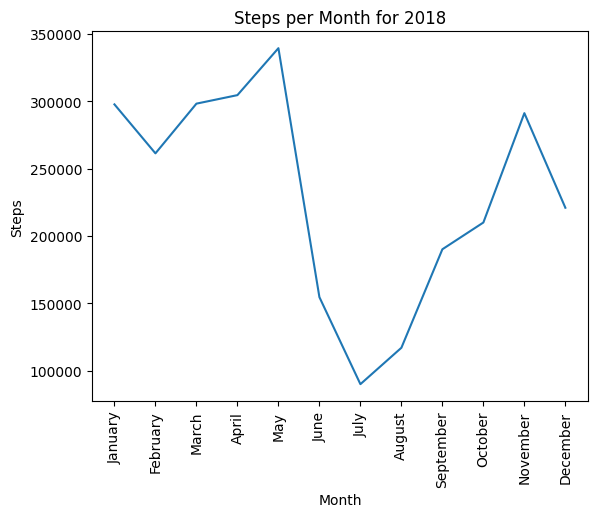

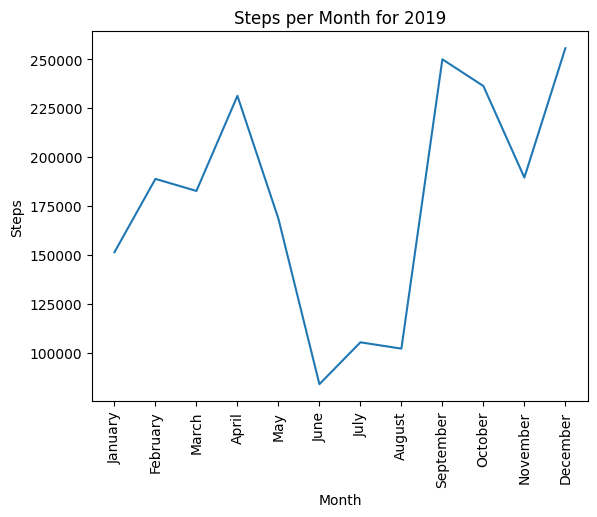

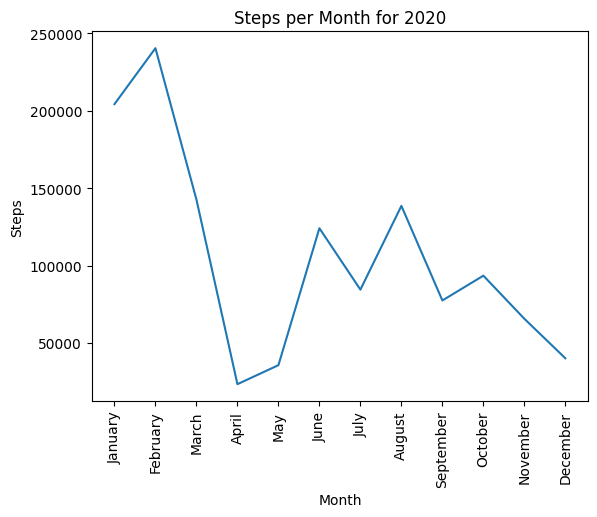

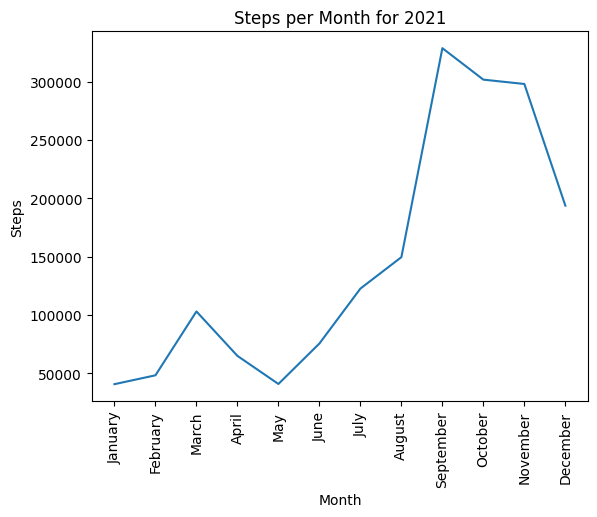

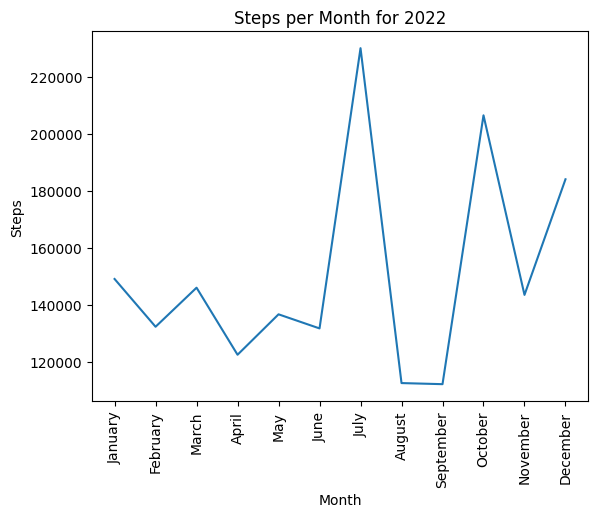

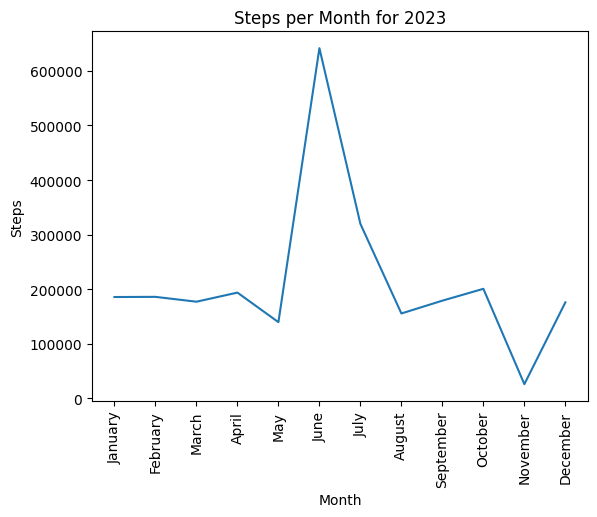

In [22]:
for index, row in df.iterrows():
    plt.figure()  
    plt.plot(row)

    plt.xlabel('Month')
    plt.ylabel('Steps')
    plt.title(f'Steps per Month for {index}')
    plt.xticks(rotation=90)
    
    plt.show()

Throughout the months step count doesn't vary that much

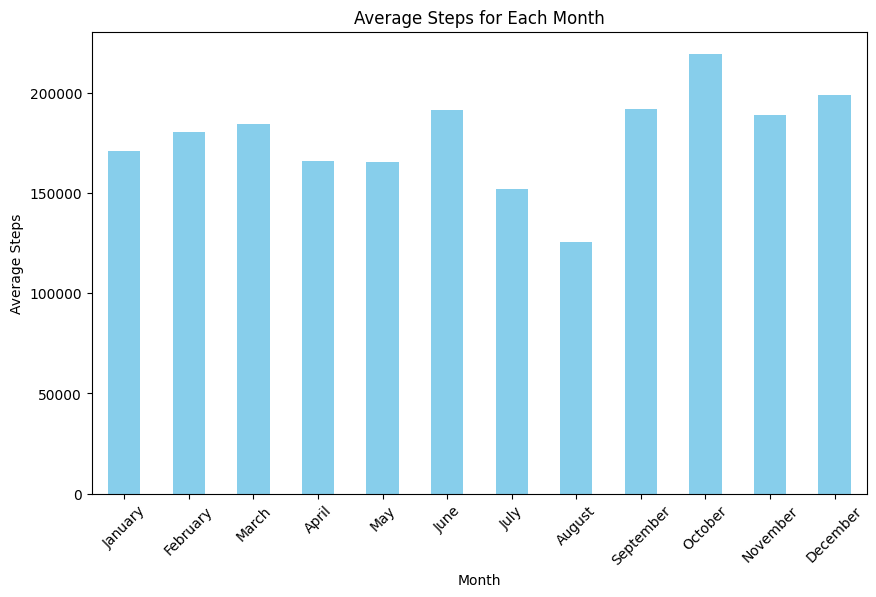

In [23]:
import matplotlib.pyplot as plt

# Calculate the average steps for each month
average_steps = df.mean()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
average_steps.plot(kind='bar', color='skyblue')
plt.title('Average Steps for Each Month')
plt.xlabel('Month')
plt.ylabel('Average Steps')
plt.xticks(rotation=45)
plt.show()


We can see that in 2020 average steps dropped significantly

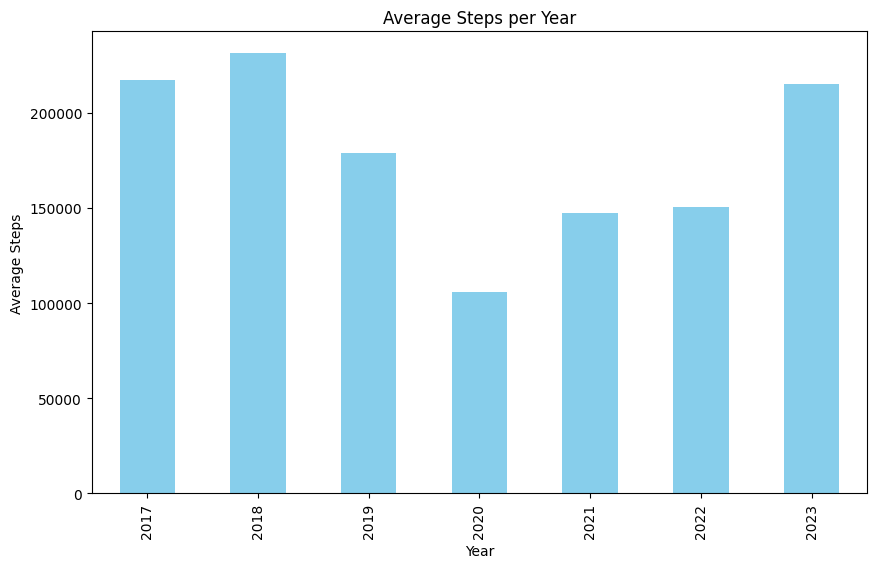

In [24]:
df_transposed = df_new.transpose()

# Plotting
df_transposed.plot(kind='bar', legend=False, color='skyblue', figsize=(10, 6))
plt.title('Average Steps per Year')
plt.xlabel('Year')
plt.ylabel('Average Steps')
plt.show()

Basal Energy Dataframe

In [25]:
list_energy = []
dict_energy = {}
year_list_energy = []

energy = soup.findAll("Record",{"type":"HKQuantityTypeIdentifierBasalEnergyBurned"})
for item in energy:
    date = str(item.get("creationDate"))
    date = date[0:date.find(' ')]
    year = int(date[0:date.find('-')])
    if(year not in year_list_energy):
        year_list_energy.append(year)



data_energy = []

for year in year_list_energy:
    month_dict_energy = {}
    for item in energy:
        if int(str(item.get("creationDate"))[0:date.find('-')]) == year:
            date = str(item.get("creationDate"))
            date = date[0:date.find(' ')]
            month = int(date[date.find('-') + 1:date.rfind('-')])
            count = float(item.get("value"))
            if month_list[month - 1] not in month_dict_energy:
                month_dict_energy[month_list[month - 1]] = count
            else:
                month_dict_energy[month_list[month - 1]] += count
    data_energy.append({"Year": year, **month_dict_energy})

# Creating the DataFrame from the list of dictionaries
df_energy = pd.DataFrame(data_energy)

# Setting the 'Year' column as the index
df_energy.set_index('Year', inplace=True)

# Filling NaN values with 0
df_energy = df_energy.fillna(0)

df_energy.columns = pd.CategoricalIndex(df_energy.columns, categories=month_list, ordered=True)
df_energy = df_energy.sort_index(axis=1)

#removing the year 2022 since it has mostly zeros
df_energy = df_energy.iloc[1:]

#assigning average of all values to the empty value in 2023 december
df_energy.at[2023, "December"] = df_energy.values.mean()
df_energy.at[2023, "November"] = df_energy.values.mean()
df_energy = df_energy.round(1)

# Displaying the DataFrame
df_energy

,January,February,March,April,May,June,July,August,September,October,November,December
Year,,,,,,,,,,,,
2023,69707.0,63003.1,69424.2,67486.2,69035.6,69024.4,70673.8,70051.7,68236.0,70625.2,63011.4,58164.4


No clear relation between basal energy and steps

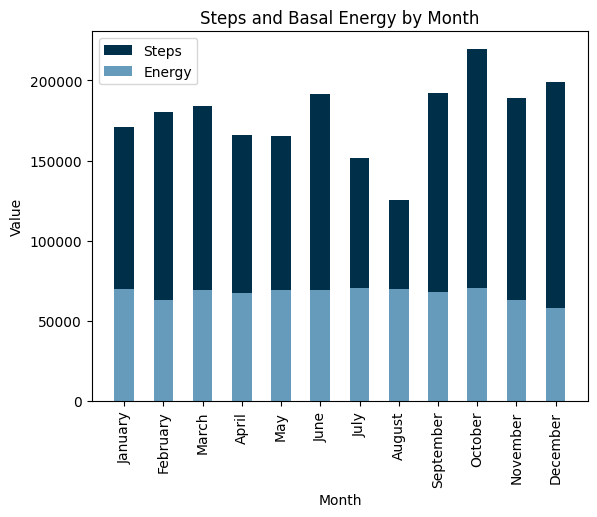

In [26]:
plt.bar(month_list,df.mean(),width=0.5,label="Steps",color="#003049")
plt.xticks(rotation=90)

plt.xlabel("Month")
plt.ylabel("Value")
plt.title("Steps and Basal Energy by Month")
plt.bar(month_list,df_energy.mean(),width=0.5,label="Energy",color="#669bbc")
plt.legend()

plt.show()

In [27]:
from scipy.stats import ttest_ind

There is no significant difference between fall months' step count and other months'

In [28]:
fall_months = df[['September', 'October', 'November']].mean(axis=1)
other_months = df.drop(['September', 'October', 'November'], axis=1).mean(axis=1)
ttest_ind(fall_months,other_months)

TtestResult(statistic=0.796691646396966, pvalue=0.44110806270492053, df=12.0)

There is a signicant difference between basal energy and step counts

In [29]:
ttest_ind(df.mean(),df_energy.mean())

TtestResult(statistic=15.547704911423127, pvalue=2.3820501497846536e-13, df=22.0)

If we take the significance level as 0.1 we can say with 90 percent confidency that steps in 2020 is significantly lower than other years

In [30]:
ttest_ind(df_new['2020'].mean(), df_new.drop('2020', axis=1).mean())

TtestResult(statistic=-2.1485463649983214, pvalue=0.08440000949848767, df=5.0)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

years = df_new.columns.astype(int).values.reshape(-1, 1)
average_steps = df_new.values.flatten()

X_train, X_test, y_train, y_test = train_test_split(years, average_steps, test_size=0.2, random_state=42)

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

predicted_steps_test_tree = tree_model.predict(X_test)

year_2024 = [[2024]]
predicted_steps_2024_tree = tree_model.predict(year_2024)

print("Predicted steps for 2024 using Decision Tree:", predicted_steps_2024_tree[0])

mse_tree = mean_squared_error(y_test/10000, predicted_steps_test_tree/10000)
print("Mean Squared Error on Test Set using Decision Tree:", mse_tree)


Predicted steps for 2024 using Decision Tree: 215032.43333333335
Mean Squared Error on Test Set using Decision Tree: 21.055179397013905


In [35]:
from sklearn.linear_model import LinearRegression
X = df.head(6).drop('December', axis=1).values
y = df.head(6)['December'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test/10000, predictions/10000)
print(f"Mean Squared Error: {mse}")

new_data_2023 = df.loc[2023].drop('December').values.reshape(1, -1)
prediction_2023 = model.predict(new_data_2023)
print(f"Predicted December 2023 step count: {prediction_2023[0]}")

Mean Squared Error: 60.92942442072436
Predicted December 2023 step count: 200689.6636976642
